# Data and analytics job market in Moscow

Data plays a huge role in decision-making and helps businesses operate more effectively nowadays. A lot of people are involved in gathering, storing, processing, and analyzing data. This little exploratory data analysis will clarify what kind of data and analytics jobs are currently in demand within the Moscow region. The research is only for non-commercial use and is based on the open data from HeadHunter (an online recruitment platform in Russia and the Commonwealth of Independent States region).

## Data pre-processing

In [1]:
#importing neccesary libraries
import requests
import re
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas import json_normalize
from wordcloud import WordCloud

#setting custom colors for visualizations
colors = ['#ddaab3','#99d4df', '#7fc9c9']

There is a HeadHunter API to parse information from the platform. According to documentation, we can use the requests library to get a response from a server in JSON format. Getting the correct information for data and analytics jobs market seems logical using the keyword "data" in a job title field. However, there is a limit to ingoing data - it is possible to get only 2000 vacancies maximum. We'll create a function with a nested loop (to get more than one page of open positions) to parse information.

In [2]:
#parsing function, maximum possible number of open positions is 2000 observations (20 pages with 100 jobs on every page)
def get_data():
    #empty list for parsed info
    x = []
    #loop for 20 pages
    for number in range(0,20):
        #setting parameters - open positions with "data" keyword in a title, area - Moscow (1), 20 pages with 100 open positions on every page
        par = {'text':'data', 'area':'1', 'per_page':100, 'page':number, 'search_field':{"name":"в названии вакансии"}}
        url = 'https://api.hh.ru/vacancies'
        #getting response and reading json format
        response = requests.get(url, params=par).json()
        x.append(response) #appending empty list with pages
    vacancies = pd.concat([json_normalize(x[i]['items']) for i in range(0,20)], ignore_index=True) #making single dataframe from a response
    return vacancies

In [3]:
data = get_data()

In [4]:
data.head()

,id,premium,name,has_test,response_letter_required,salary,address,response_url,sort_point_distance,published_at,...,address.id,insider_interview.id,insider_interview.url,address.metro.station_name,address.metro.line_name,address.metro.station_id,address.metro.line_id,address.metro.lat,address.metro.lng,employer.logo_urls
0,73471184,True,Data engineer,False,False,NaN,NaN,https://hh.ru/vacancy/72030869,None,2022-12-23T09:05:06+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,74130973,False,Data Engineer,False,False,NaN,NaN,None,None,2022-12-22T09:40:55+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,71647537,False,Junior Data Analyst,False,False,NaN,NaN,None,None,2022-12-23T16:26:26+0300,...,399767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,74080730,False,Data Engineer,False,False,NaN,NaN,None,None,2022-12-21T10:10:19+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,74181154,False,Data Analyst,False,False,NaN,NaN,None,None,2022-12-23T12:52:45+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631 entries, 0 to 630
Data columns (total 68 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           631 non-null    object 
 1   premium                      631 non-null    bool   
 2   name                         631 non-null    object 
 3   has_test                     631 non-null    bool   
 4   response_letter_required     631 non-null    bool   
 5   salary                       0 non-null      float64
 6   address                      0 non-null      float64
 7   response_url                 3 non-null      object 
 8   sort_point_distance          0 non-null      object 
 9   published_at                 631 non-null    object 
 10  created_at                   631 non-null    object 
 11  archived                     631 non-null    bool   
 12  apply_alternate_url          631 non-null    object 
 13  immediate_redirect_u

In [6]:
print(data.isna().mean().sort_values(ascending=False).loc[lambda x: x > 0])

employer.logo_urls             1.000000
sort_point_distance            1.000000
department                     1.000000
address.description            1.000000
address.metro                  1.000000
insider_interview              1.000000
contacts                       1.000000
salary                         1.000000
address                        1.000000
response_url                   0.995246
immediate_redirect_url         0.995246
insider_interview.id           0.960380
insider_interview.url          0.960380
salary.to                      0.941363
salary.from                    0.923930
salary.currency                0.906498
salary.gross                   0.906498
address.metro.station_name     0.656101
address.metro.lng              0.656101
address.metro.line_id          0.656101
address.metro.line_name        0.656101
address.metro.station_id       0.656101
address.metro.lat              0.656101
department.id                  0.625990
department.name                0.625990


In [7]:
print(len(data.isna().mean().sort_values(ascending=False).loc[lambda x: x > 0]))

42


So we have parsed 637 unique opened positions in the data and analytics job market in Moscow. It is worth mentioning that there are a lot of missing values in the dataset (42 columns). Especially there is no information about salaries, which could be a very exciting topic to research.  

In [8]:
data.columns

Index(['id', 'premium', 'name', 'has_test', 'response_letter_required',
       'salary', 'address', 'response_url', 'sort_point_distance',
       'published_at', 'created_at', 'archived', 'apply_alternate_url',
       'immediate_redirect_url', 'insider_interview', 'url',
       'adv_response_url', 'alternate_url', 'relations', 'contacts',
       'working_days', 'working_time_intervals', 'working_time_modes',
       'accept_temporary', 'department.id', 'department.name', 'area.id',
       'area.name', 'area.url', 'type.id', 'type.name', 'employer.id',
       'employer.name', 'employer.url', 'employer.alternate_url',
       'employer.logo_urls.240', 'employer.logo_urls.90',
       'employer.logo_urls.original', 'employer.vacancies_url',
       'employer.trusted', 'snippet.requirement', 'snippet.responsibility',
       'schedule.id', 'schedule.name', 'department', 'salary.from',
       'salary.to', 'salary.currency', 'salary.gross', 'address.city',
       'address.street', 'address.buildi

In [9]:
data['name'].unique()

array(['Data engineer', 'Data Engineer', 'Junior Data Analyst',
       'Data Analyst', 'Middle/Senior Data Engineer в Sber AI Lab',
       'Data Scientist',
       'Data Scientist в команду лояльности СберСпасибо',
       'Аналитик данных (Data Office)', 'Data scientist',
       'Аналитик Data Science (консультант)',
       'Аналитик данных / Data scientist',
       'Senior Data scientist (Управление рисками корпоративных клиентов)',
       'Senior Data Engineer', 'Data Steward',
       'Заместитель руководителя (Data analysis)', 'Master Data Manager',
       'Скоринг-аналитик / Data scientist / Аналитик (скоринг)',
       'Data/Product Analyst', 'Junior Data Engineer / Data Analyst',
       'Data-аналитик', 'Data analyst',
       'Дата-сайентист / Data Scientist (Computer Vision)',
       'Data Analyst / Аналитик данных', 'Data Engineer/Инженер данных',
       'Аналитик данных (data analyst) - CRM, CDP платформа',
       'Junior/Middle Data Scientist', 'Data QA',
       'Data Engineer

There are a lot of mixed names in the column, containing English and Russian languages. Also, there is a lot of unclarified open position, for example, "Data engineer / Data scientist / Руководитель отдела аналитики". The clearest way to count unique names seems to be by keeping names written in English.

In [10]:
def processing(text):
    cleared = re.sub(r"[^a-zA-z]", ' ', text) 
    return " ".join(cleared.split())

In [25]:
data['name_processed'] = data['name'].apply(processing)
data['name_processed'] = data['name_processed'].str.title()

In [26]:
data['name_processed'].unique()

array(['Data Engineer', 'Junior Data Analyst', 'Data Analyst',
       'Middle Senior Data Engineer Sber Ai Lab', 'Data Scientist',
       'Data Office', 'Data Science', 'Senior Data Scientist',
       'Senior Data Engineer', 'Data Steward', 'Data Analysis',
       'Master Data Manager', 'Data Product Analyst',
       'Junior Data Engineer Data Analyst', 'Data',
       'Data Scientist Computer Vision', 'Data Analyst Crm Cdp',
       'Junior Middle Data Scientist', 'Data Qa',
       'Data Engineer Senior Middle', 'Data Big Data',
       'Data Analyst Data Scientist', 'Data Scientist Senior',
       'Data Scientist Nlp', 'Pbi Data Engineer',
       'Data Engineer Data Scientist', 'Head Of Data',
       'Data Engineer Dwh', 'Ml Team Lead Mts Travel Big Data',
       'Data Science Machine Learning', 'Data Scientist Middle',
       'Data Engineer Perception', 'Ms Sql Data Engineer',
       'Data Scientist Marketplace Efficiency', 'Data Scientist Ml',
       'Middle Senior Data Engineer', 'Da

The next step is to analyse salary for data engineers. We will do this with several columns: `salary.from` - showing start point for this position, `salary.to` - showing maximum salary for opened position and `salary.currency` - showing in which currency salary are paid off.

As we can see from below we have three main currencies which are used to pay for data engineers positions. For USD we will multiplay this value with 70 (RUB/USD pair) and for EUR multiply with 80 (RUB/EUR pair).

In [13]:
data['salary.currency'].unique()

array([nan, 'RUR', 'USD', 'EUR'], dtype=object)

In [14]:
def currency_change(row):

    if row['salary.currency'] == 'USD':
        row['salary.from.conv'] = row['salary.from'] * 70
        row['salary.to.conv'] = row['salary.to'] * 70
    
    elif row['salary.currency'] == 'EUR':
        row['salary.from.conv'] = row['salary.from'] * 80
        row['salary.to.conv'] = row['salary.to'] * 80
    
    else:
        row['salary.from.conv'] = row['salary.from']
        row['salary.to.conv'] = row['salary.to']

    return row

In [15]:
data = data.apply(currency_change, axis=1)

## EDA

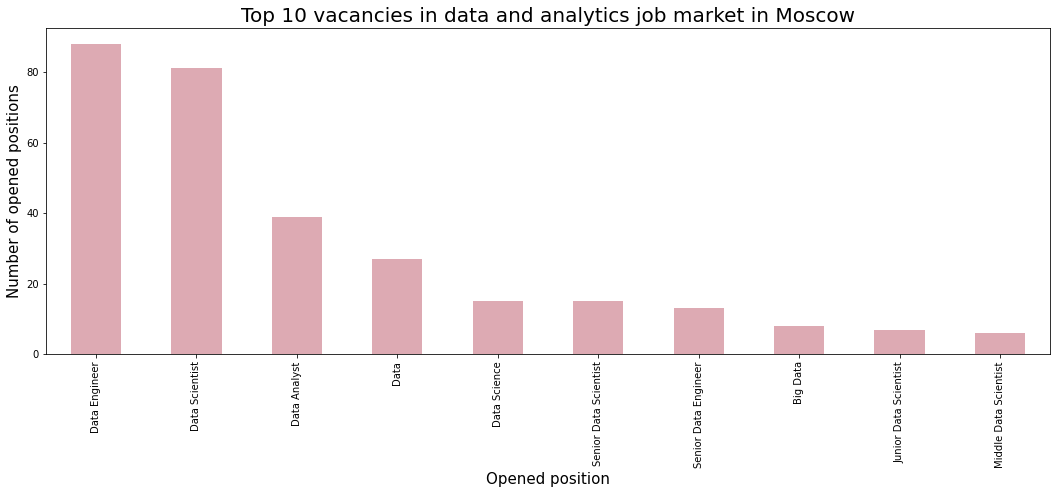

In [28]:
#top 10 vacancies
data['name_processed'].value_counts().head(10).plot(kind='bar', figsize=(18,6), color = '#ddaab3')
plt.title('Top 10 vacancies in data and analytics job market in Moscow', fontsize=20)
plt.xlabel('Opened position', fontsize=15)
plt.ylabel('Number of opened positions', fontsize=15);

As we can see from the chart data engineers are in the most demand at the moment. Who is Data Engineer? What are the main skills which are required for this role? To answer these questions we'll go through the `snippet.requirements` column. It contains skills that are must-have for candidates. The column contains a lot of textual descriptions with several skills marked in English. We will parse these skills from each requirement.

In [17]:
data['snippet.requirement']

0      Не менее 3-х лет работы в качестве <highlightt...
1      Опыт работы в качестве инженера данных от 2-х ...
2      человека с высшим математическим или техническ...
3      Опыт работы в средах: Будет преимуществом : Оп...
4      Хорошие знания SQL. Знания Python. Понимание б...
                             ...                        
626    Знание финансовой математики и понимание ее эк...
627    Высокий уровень технических знаний инструменто...
628    Высшее математическое, экономико-математическо...
629    Понимание устройства современных компьютеров и...
630    Высшее техническое образование в сфере Информа...
Name: snippet.requirement, Length: 631, dtype: object

Let's create a function which converts values to a list and splitting them into a single value. Then using regex library, the function is searching for English words in a list of values. After that, it is building a word cloud from the skills. As we can see the most demanded skills for data engineers are SQL, python, and understanding data concepts.

In [18]:
def skills(role):
    requirements = data[data['name_processed']==role]['snippet.requirement'].dropna().to_list() #making a list from a requirements column
    list_len = len(requirements)
    x = []
    for number in range(0, list_len-1):
        splitted = requirements[number].split()
        x.extend(splitted)
    text = ''.join(x).capitalize()
    skills = re.findall('[a-z]+', text, flags=re.IGNORECASE) #searching for english words with regex
    cleared_skill = pd.Series([x for x in skills if x != 'highlighttext']).to_string() #deleting "highlightext" from series
    
    wordcloud = WordCloud(width = 800, height = 800,background_color ='white',min_font_size = 10).generate(cleared_skill)
    plt.figure(figsize = (6, 6), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()

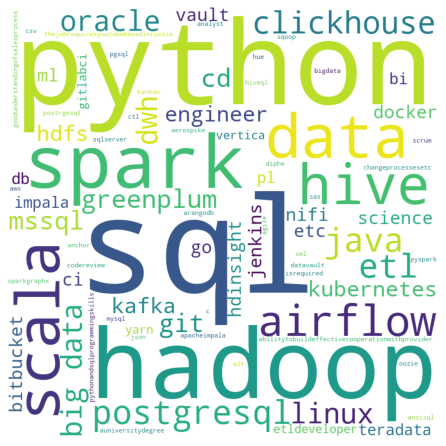

In [19]:
skills('Data Engineer')

Let's analyze the salaries for Data Engineers in Moscow region.

In [29]:
def salary(role):
   money = data[data['name_processed']== role][['name_processed', 'salary.from.conv','salary.to.conv']].dropna()
   fig, ax = plt.subplots(ncols=2, figsize=(20, 8), sharey=True)

   sns.boxplot(data=money, y='salary.from.conv', palette = colors, ax=ax[0])
   ax[0].set_title('Salary lower bounds boxplot')
   ax[0].set_xlabel(f'{role}')
   ax[0].set_ylabel('Salary in rubles')

   sns.boxplot(data=money, y='salary.to.conv', palette = colors, ax=ax[1])
   ax[1].set_title('Salary upper bounds boxplot')
   ax[1].set_xlabel(f'{role}')
   ax[1].set_ylabel('Salary in rubles')

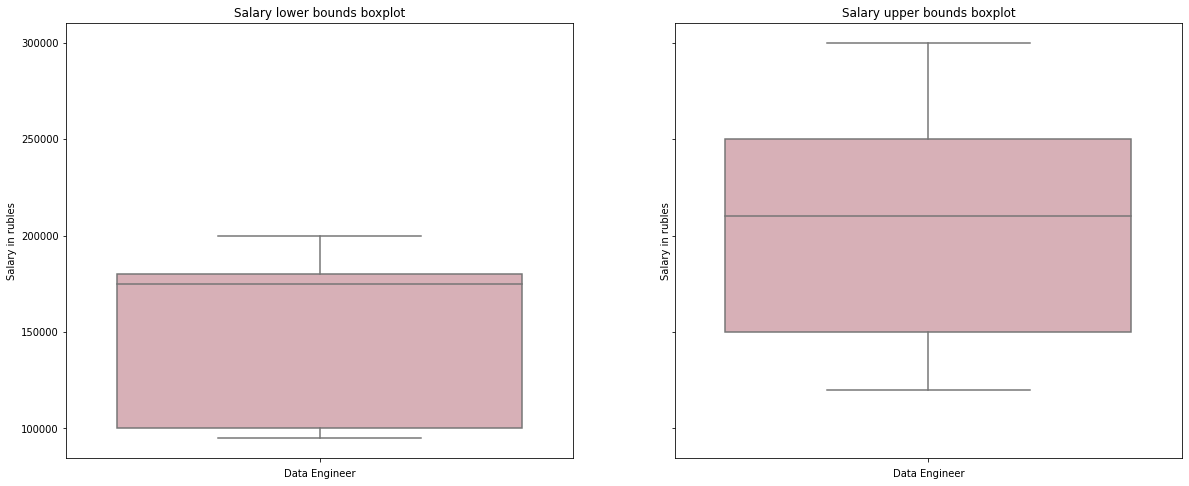

In [30]:
salary('Data Engineer')

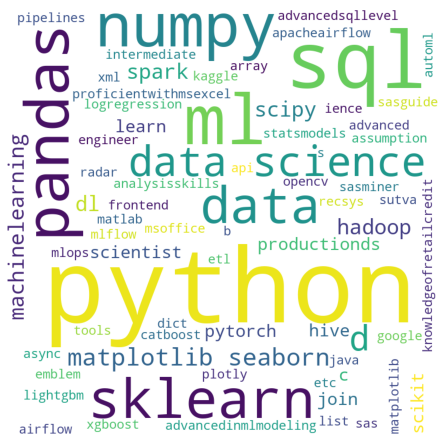

In [31]:
skills('Data Scientist')

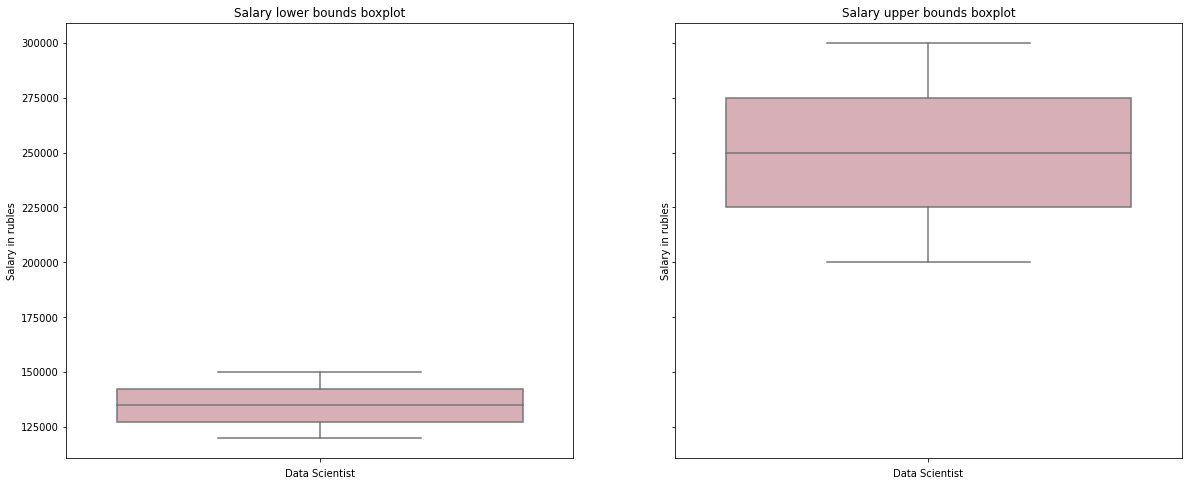

In [32]:
salary('Data Scientist')